In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import subprocess

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
import scipy.stats as sp
import sklearn.metrics

# Part 1: Read in Stokes et al. data

In [2]:
s1b = pd.read_excel('../data/Stokes_et_al_2020_raw_data.xlsx', sheet_name = 1, header = 1)
s1b

,Mean_Inhibition,SMILES,Name,Activity
0,0.041572,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,Active
1,0.041876,CON=C1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)CC...,GEMIFLOXACIN MESYLATE,Active
2,0.041916,CCC(C)CCCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O...,POLYMYXIN B SULFATE,Active
3,0.041964,Cl.N=C(N)n1cccn1,PRAXADINE HYDROCHLORIDE,Active
4,0.042295,Cl.Cl.N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(...,CHLORHEXIDINE DIHYDROCHLORIDE,Active
...,...,...,...,...
2330,1.235350,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(O)C1C(C...,COLFORSIN,Inactive
2331,1.251650,O=S(=O)([O-])c1cc(O)c2c(N=Nc3ccc(Nc4ccccc4)c4c...,ANAZOLENE SODIUM,Inactive
2332,1.273150,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,DAPSONE,Inactive
2333,2.263200,Cc1cc(-c2ccc(N=Nc3ccc4c(S(=O)(=O)[O-])cc(S(=O)...,EVANS BLUE,Inactive


In [3]:
print(len(s1b))
actives = s1b[s1b['Activity'] == 'Active']
print(len(actives))

2335
120


In [4]:
s1b['hit'] = [1.0 if x == 'Active' else 0.0 for x in list(s1b['Activity'])]
train_set = s1b[['SMILES', 'Name', 'hit']]
print(sum(train_set['hit']))
train_set.to_csv('../out/stokes_et_al_train_set_for_ml.csv', index = False)
train_set

120.0


,SMILES,Name,hit
0,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,1.0
1,CON=C1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)CC...,GEMIFLOXACIN MESYLATE,1.0
2,CCC(C)CCCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O...,POLYMYXIN B SULFATE,1.0
3,Cl.N=C(N)n1cccn1,PRAXADINE HYDROCHLORIDE,1.0
4,Cl.Cl.N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(...,CHLORHEXIDINE DIHYDROCHLORIDE,1.0
...,...,...,...
2330,C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(O)C1C(C...,COLFORSIN,0.0
2331,O=S(=O)([O-])c1cc(O)c2c(N=Nc3ccc(Nc4ccccc4)c4c...,ANAZOLENE SODIUM,0.0
2332,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,DAPSONE,0.0
2333,Cc1cc(-c2ccc(N=Nc3ccc4c(S(=O)(=O)[O-])cc(S(=O)...,EVANS BLUE,0.0


# Part 2: Make an analogous model to Stokes et al. and predict on the primary screen

In [5]:
# you can run this in the terminal / on the cloud / with subprocess so you can stay within the Jupyter Notebook

# conda activate chemprop
# mkdir ../models/stokes_et_al_model_2300/;
# chemprop_train --save_dir ../models/stokes_et_al_model_2300/ --dropout 0.35 --hidden_size 1600 --ffn_num_layers 1 --depth 5 --data_path ../out/stokes_et_al_train_set_for_ml.csv --dataset_type classification --features_generator rdkit_2d_normalized --no_features_scaling --num_folds 10 --ensemble_size 3 --split_sizes 0.8 0.1 0.1 --smiles_columns SMILES --target_columns hit

In [6]:
# use this model to predict on ian DRH data

groundtruthdrh = pd.read_csv('../out/data_for_ml.csv')
display(groundtruthdrh)

# you can run this in the terminal / on the cloud / with subprocess so you can stay within the Jupyter Notebook

# activate_command = 'source activate chemprop; '
# run_command = 'python predict.py --test_path ../out/data_for_ml.csv --checkpoint_dir ../models/stokes_et_al_model_2300/ --preds_path ../out/predictions_on_drh_screen_with_stokes_et_al.csv --features_generator rdkit_2d_normalized --no_features_scaling --smiles_column SMILES'
# full_command = activate_command + run_command
# test = subprocess.run(full_command, cwd="../chemprop/", shell=True, capture_output=True)
# print(test)

,SMILES,Name,hit_inh,hit_kill
0,CCCC[C@H](CC)CNC(=N)N=C(N)NCCCCCCNC(N)=NC(=N)N...,alexidine,True,True
1,NC(Nc1ccc(Cl)cc1)=NC(=N)NCCCCCCNC(=N)N=C(N)Nc1...,chlorhexidine,True,True
2,CC[C@@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([...,polymyxin-B-sulfate,True,True
3,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,True,True
4,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,bekanamycin,True,True
...,...,...,...,...
6715,CC(O)(CC(O)=O)CC(O)=O,meglutol,False,False
6716,CCCCCCCCN[C@H](C)[C@@H](O)c1ccc(SC(C)C)cc1 |&1...,suloctidil,False,False
6717,CCc1nn(CCCN2CCN(CC2)c2cccc(Cl)c2)c(=O)n1CCOc1c...,nefazodone,False,False
6718,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,ribostamycin,False,False


# Part 3: Evaluate model predictions

In [7]:
# evaluate each prediction
def modeleval(y_true, y_pred, name = ''):
    
    new_ytrue = []
    new_ypred = []
    for x, y in zip(y_true, y_pred):
        if y != 'Invalid SMILES':
            try:
                new_ytrue.append(int(x))
                new_ypred.append(float(y))
            except Exception as e:
                #print(x)
                #print(e)
                continue
            
    y_true = new_ytrue
    y_pred = new_ypred

    auroc = float(roc_auc_score(y_true, y_pred))
    print('auroc: ' + str(auroc))

    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    pr = float(auc(recall,precision))
    print('precision recall: ' + str(pr))

    fig, ax = plt.subplots(figsize = (2,2), dpi = 300)
    plt.clf()
    plt.plot(recall, precision, label='Precision-recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()

    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    fig, ax = plt.subplots(figsize = (2,2), dpi = 300)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout() 
    
    return(auroc, pr, y_true, y_pred)

hit_inh
auroc: 0.8954728084749387
precision recall: 0.4522881543451478
num positives:  89.0
mcc:  0.44383483813018915
hit_kill
auroc: 0.7194586167800453
precision recall: 0.07538236118885945
num positives:  89.0
mcc:  0.1275616394000172


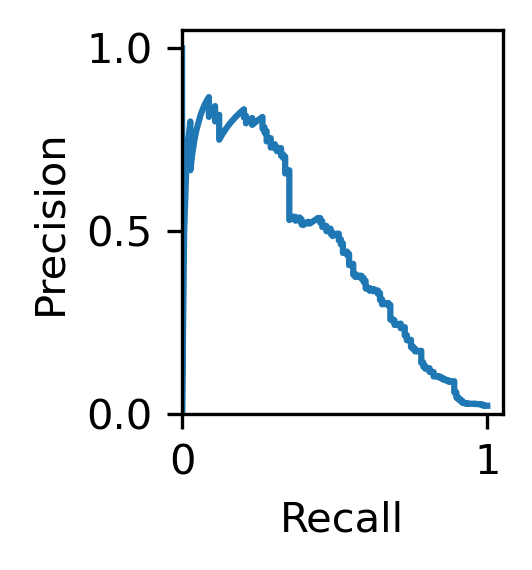

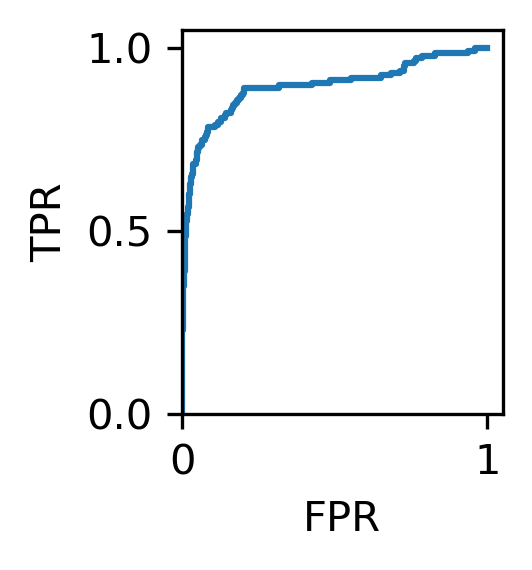

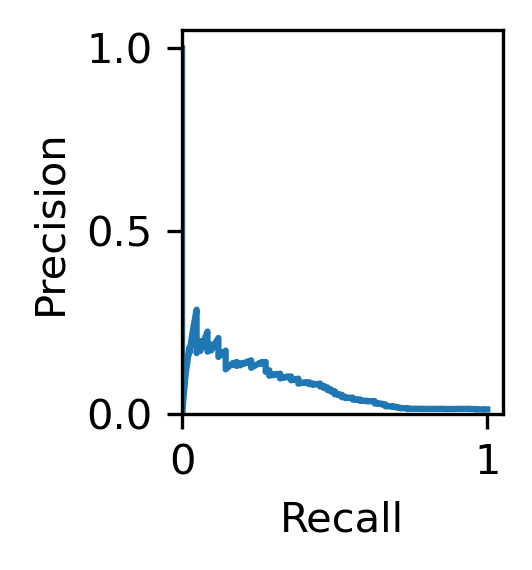

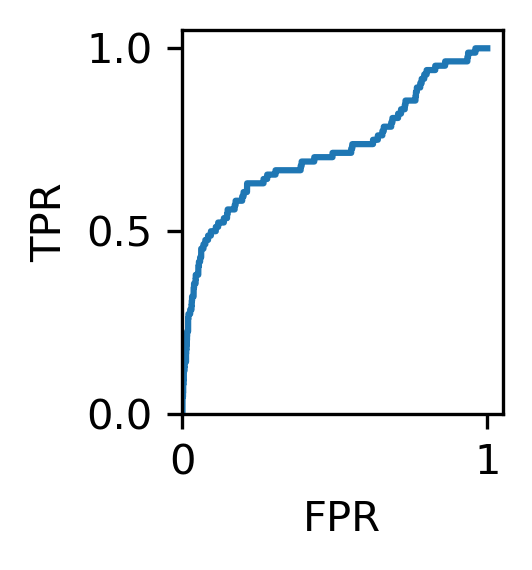

In [8]:
for met in ['hit_inh', 'hit_kill']:
    print(met)
    df = pd.read_csv('../out/predictions_on_drh_screen_with_stokes_et_al.csv')
    groundtruthdrh = pd.read_csv('../out/data_for_ml.csv')
    auroc, pr, y_true, y_pred = modeleval(list(groundtruthdrh[met]), list(df['hit']))
    sp.pearsonr(y_true, y_pred)

    # and binary class too
    thresh = 0.5 # set an arbitrary threshold to estimate MCCs (could be lower for discovery purposes)
    tests = [1.0 if x else 0.0 for x in [y > thresh for y in y_pred]]
    
    print('num positives: ', sum(tests))
    print('mcc: ', sklearn.metrics.matthews_corrcoef(y_true, tests))
    


auroc: 0.8954728084749387
precision recall: 0.4522881543451478
auroc: 0.7194586167800453
precision recall: 0.07538236118885945


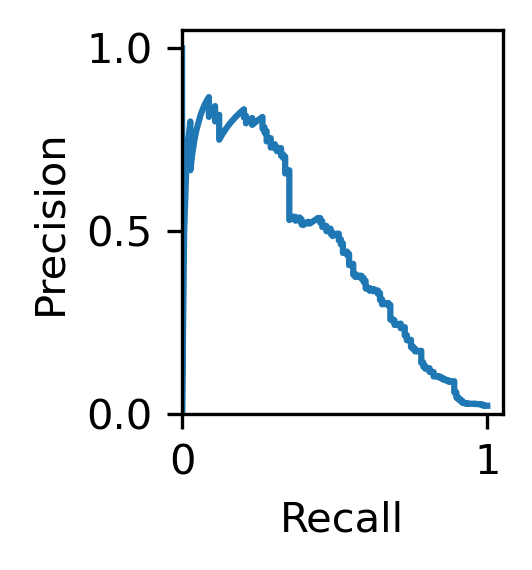

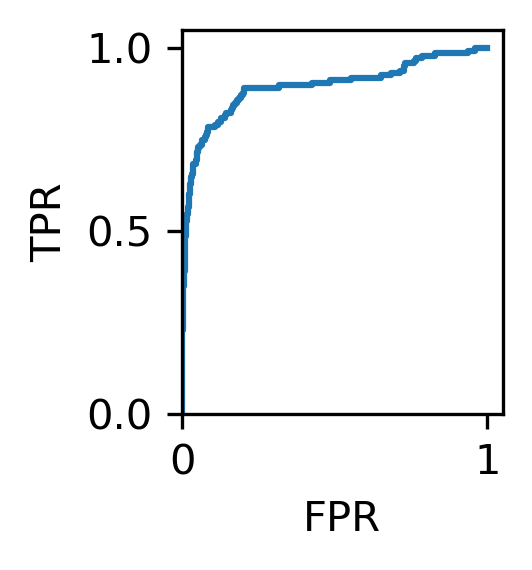

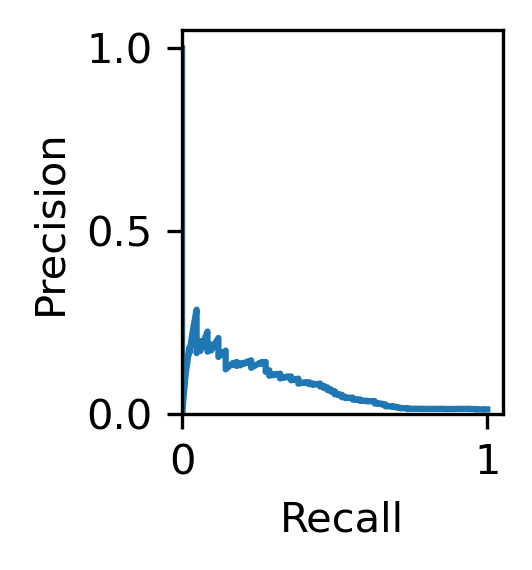

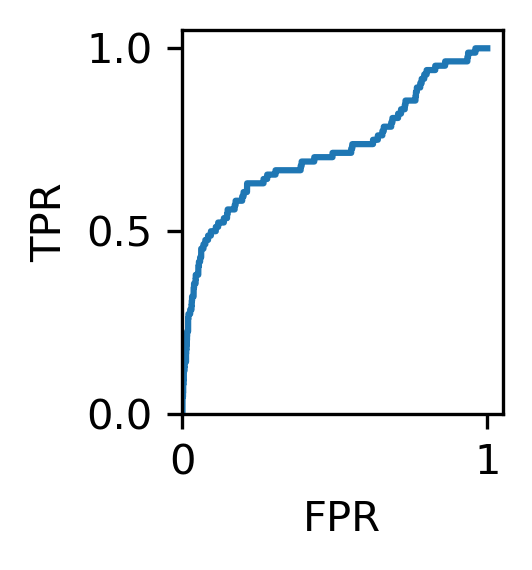

In [9]:
_, _, y_true_inh, y_pred_inh = modeleval(list(groundtruthdrh['hit_inh']), list(df['hit']));
_, _, y_true_kill, y_pred_kill = modeleval(list(groundtruthdrh['hit_kill']), list(df['hit']));

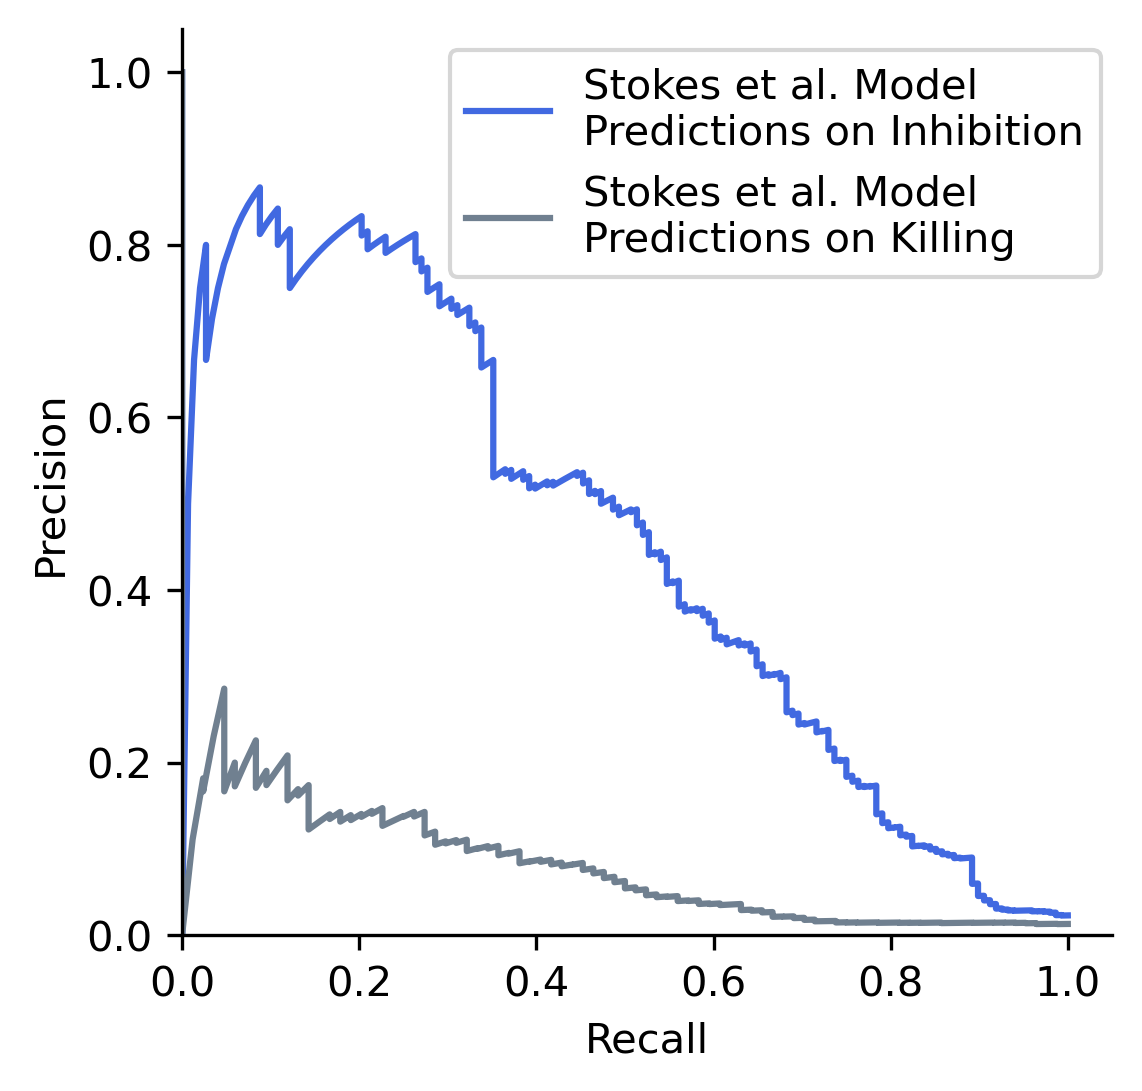

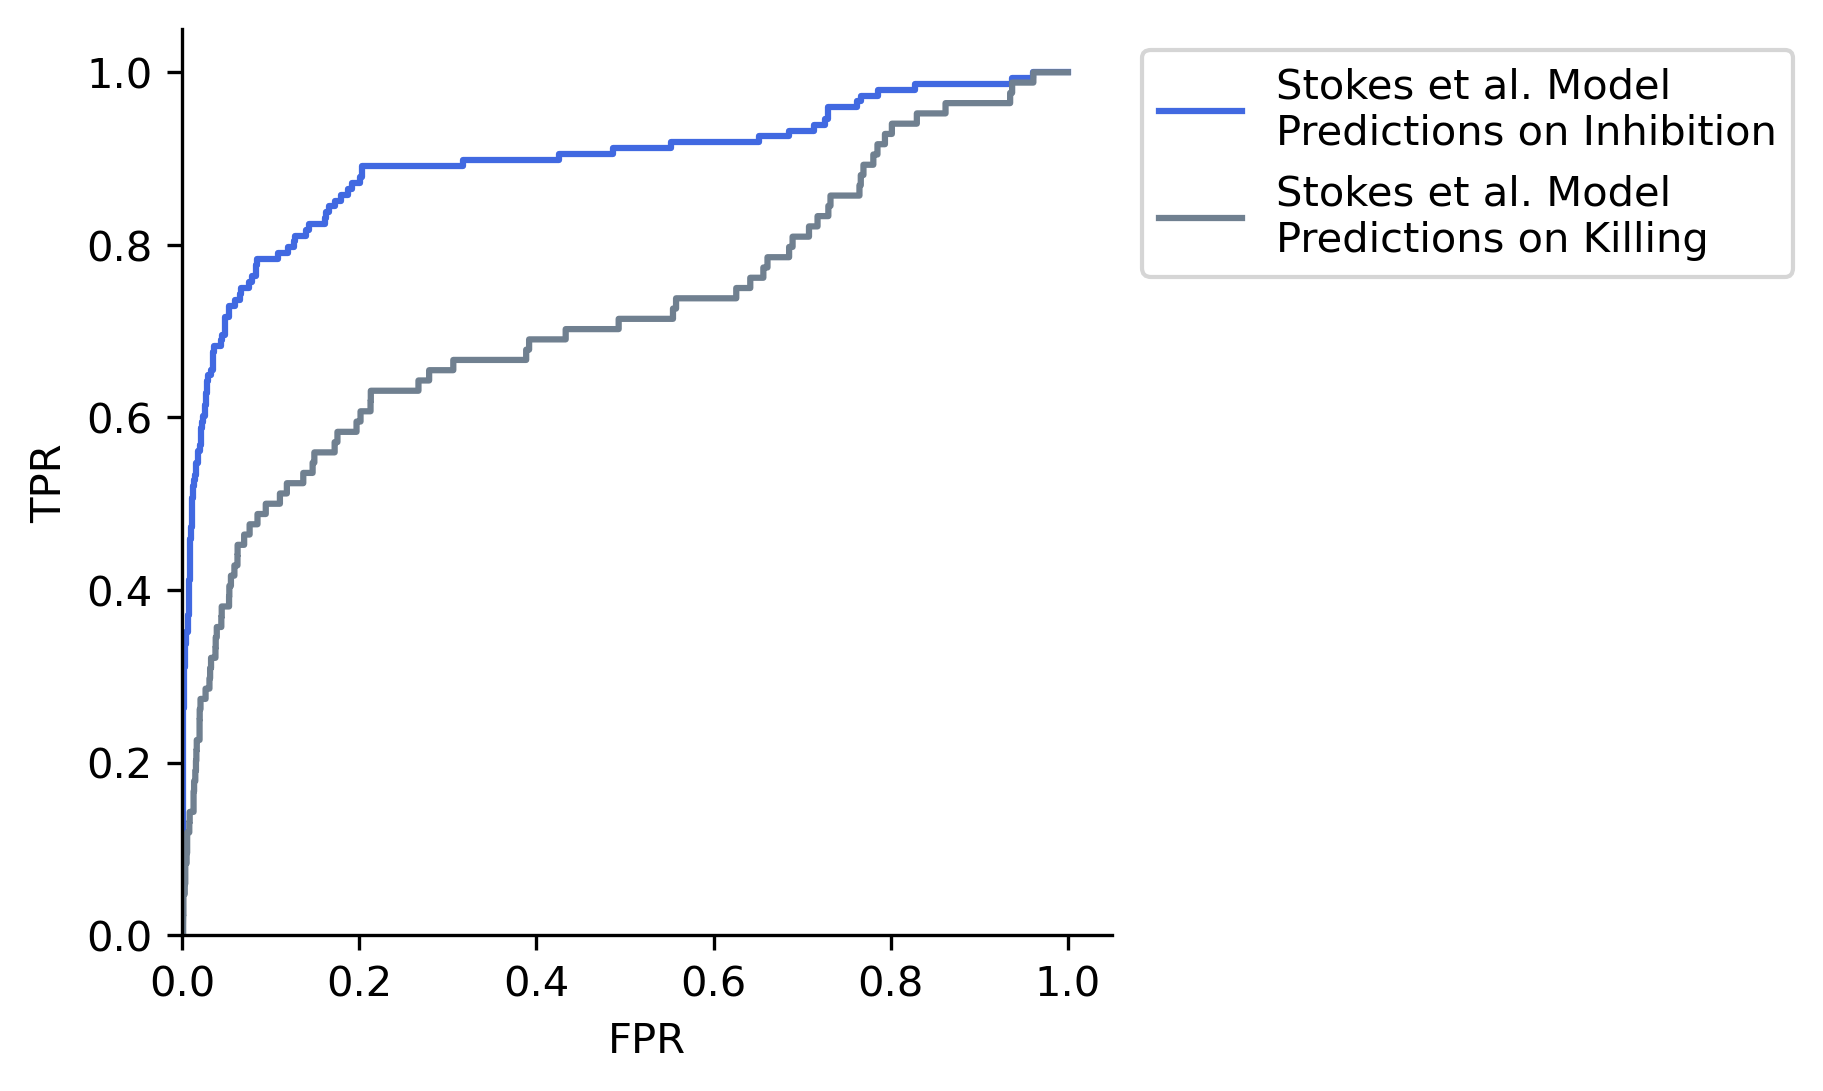

In [10]:
fig, ax = plt.subplots(figsize = (4,4), dpi = 300)
prec_inh, rec_inh, _ = precision_recall_curve(y_true_inh, y_pred_inh)
plt.plot(rec_inh, prec_inh, label='Stokes et al. Model\nPredictions on Inhibition', color = 'royalblue')
prec_kill, rec_kill, _ = precision_recall_curve(y_true_kill, y_pred_kill)
plt.plot(rec_kill, prec_kill, label='Stokes et al. Model\nPredictions on Killing', color = 'slategrey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.savefig('../figure_panels/1G_prc_curve_comparing_stokes_modelon_ian_data.png')
plt.show()

fig, ax = plt.subplots(figsize = (4,4), dpi = 300)
fpr_inh, tpr_inh, _ = metrics.roc_curve(y_true_inh, y_pred_inh)
plt.plot(fpr_inh, tpr_inh, label='Stokes et al. Model\nPredictions on Inhibition', color = 'royalblue')
fpr_kill, tpr_kill, _ = metrics.roc_curve(y_true_kill, y_pred_kill)
plt.plot(fpr_kill, tpr_kill, label='Stokes et al. Model\nPredictions on Killing', color = 'slategrey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.savefig('../figure_panels/1G_roc_curve_comparing_stokes_modelon_ian_data.png')
plt.show()